In [5]:
# importing Libraries
!pip install tensorflow-gpu
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-fn_wxd_b/tensorflow-gpu_b662397cc6ed435cb760210e7c474143/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERRO

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
# Checking the version of Tensorflow ans keras
print(f"Tensorflow version: {tf.__version__}")
# Check Keras version (assuming it's installed as part of TensorFlow)
print(f"Keras Version: {keras.__version__}")

NameError: name 'tf' is not defined

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
os.chdir("/content/drive")

In [4]:
os.getcwd()

'/content'

In [5]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
check_list = ['GPU','CPU']
for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out)>0:
      print(f"{device} is available")
      print(f"Details >> {out} ")
    else:
      print(f"{device} isn't available ")

GPU is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')] 


# Creating a samclassifier using keras on MNIST data

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [10]:
(X_train_full, y_train_full) , (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train_full[0].shape

(28, 28)

In [14]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [15]:
print(f"data type of X_train_full: {X_train_full.dtype}, \n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8, 
 shape of X_train_full: (60000, 28, 28)


In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
# Create the validation data set from yhe full training data
# scale the data between 0 to 1 by divided it by 255, as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.0

# TRAIN = 55000
# TEST = 10000
# VALID = 5000

In [18]:
len(X_train_full[5000:])

55000

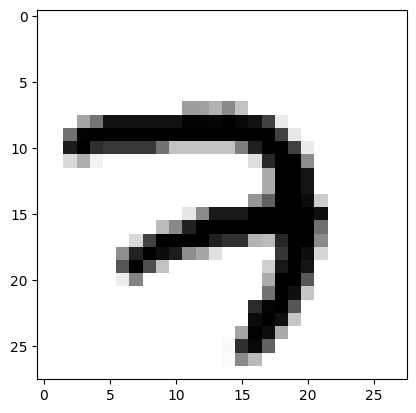

In [19]:
# Let view some data
plt.imshow(X_train[0], cmap="binary")

<Axes: >

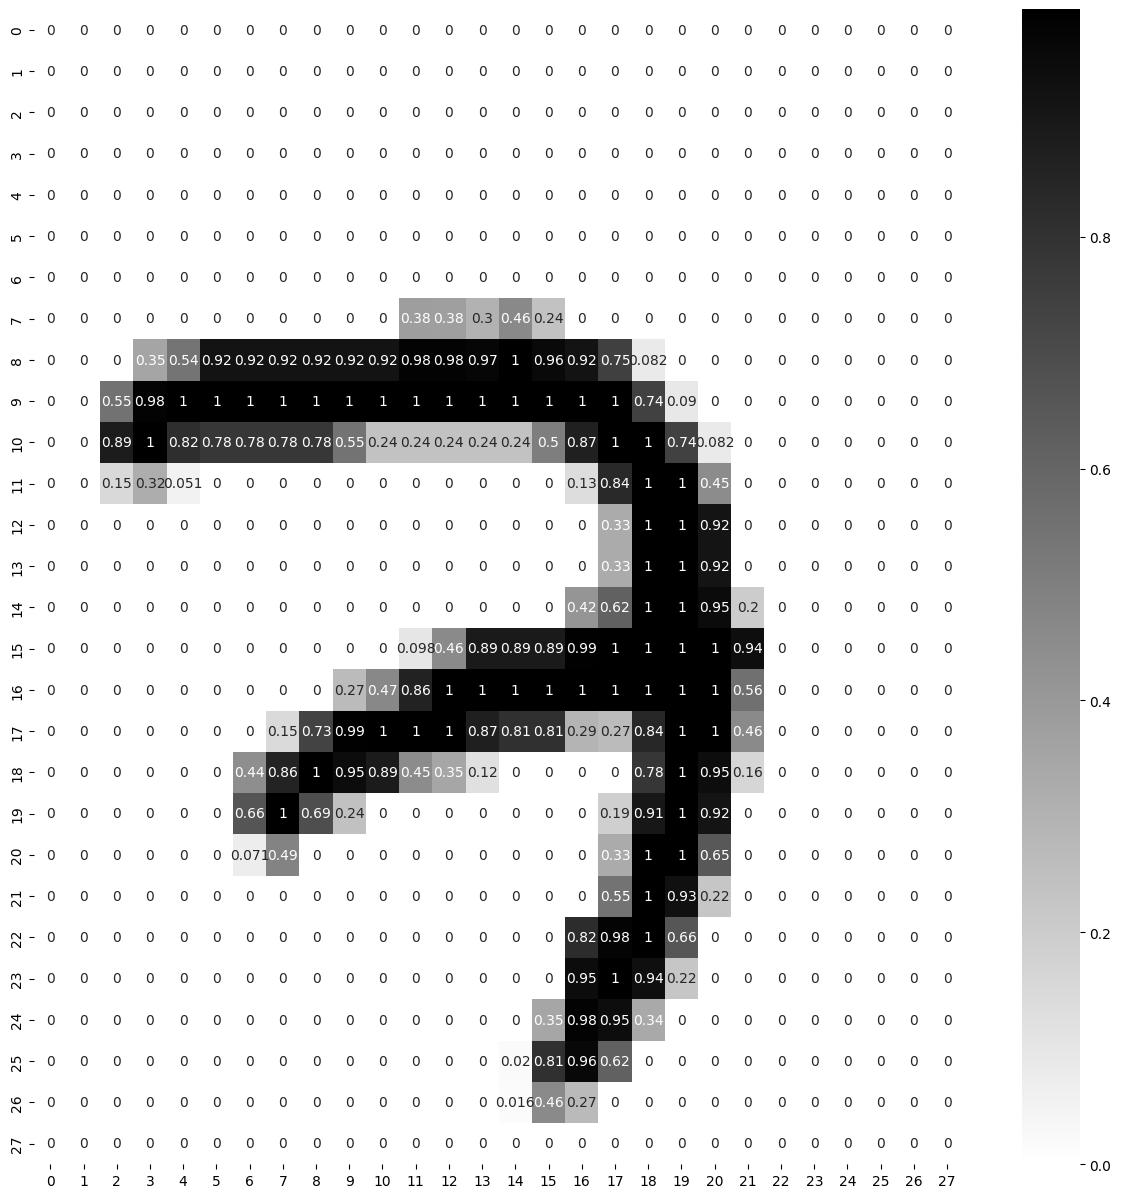

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot = True , cmap = 'binary')

In [21]:
28*28


784

In [22]:
# 10 output
# 1,2,3,4,5,6,7,8,9

In [23]:
# Creating layers of ANN
LAYERS =  [tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
           tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
           tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
           tf.keras.layers.Dense(10,  activation="softmax", name="outputLayer")]
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
# Method-2

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# define the model
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# model.add(Dense(units=64, activation='relu'), input_dim=100)
# model.add(Dense(units=10, activation='softmax'))

# compile the model
# model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
# model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# train the model
# model.fit(X_train,y_train, epochs=5, batch_size=32)


In [24]:
model_clf.layers


In [25]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# firstLayer * secondLayer + bias
(784 * 300) + 300, 300 * 100 + 100, 100 * 10 + 10

(235500, 30100, 1010)

In [27]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [28]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [29]:
hidden1.get_weights()

[array([[ 0.0061208 , -0.01381325, -0.06655805, ...,  0.00662239,
          0.00385286,  0.05843188],
        [ 0.01242359,  0.02279087, -0.03446275, ..., -0.05480679,
         -0.05743854,  0.03601297],
        [-0.03851504,  0.06491205, -0.04567247, ..., -0.0606504 ,
          0.07411385, -0.03751685],
        ...,
        [ 0.03427812,  0.05772549, -0.03826752, ...,  0.026638  ,
          0.05750096,  0.0420741 ],
        [-0.00903729, -0.00887036, -0.05191662, ...,  0.06975618,
         -0.01342317,  0.04874114],
        [-0.03590142,  0.02776281,  0.03548027, ..., -0.00628296,
         -0.02389693, -0.0576692 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [30]:
hidden1.get_weights()[0].shape


(784, 300)

In [31]:
hidden1.get_weights()[1].shape

(300,)

In [32]:
weights, biases = hidden1.get_weights()

In [33]:
weights.shape

(784, 300)

In [34]:
biases.shape

(300,)

In [35]:
print("shape\n",biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
print("weights\n",weights.shape, "\n", weights)
weights

weights
 (784, 300) 
 [[ 0.0061208  -0.01381325 -0.06655805 ...  0.00662239  0.00385286
   0.05843188]
 [ 0.01242359  0.02279087 -0.03446275 ... -0.05480679 -0.05743854
   0.03601297]
 [-0.03851504  0.06491205 -0.04567247 ... -0.0606504   0.07411385
  -0.03751685]
 ...
 [ 0.03427812  0.05772549 -0.03826752 ...  0.026638    0.05750096
   0.0420741 ]
 [-0.00903729 -0.00887036 -0.05191662 ...  0.06975618 -0.01342317
   0.04874114]
 [-0.03590142  0.02776281  0.03548027 ... -0.00628296 -0.02389693
  -0.0576692 ]]


array([[ 0.0061208 , -0.01381325, -0.06655805, ...,  0.00662239,
         0.00385286,  0.05843188],
       [ 0.01242359,  0.02279087, -0.03446275, ..., -0.05480679,
        -0.05743854,  0.03601297],
       [-0.03851504,  0.06491205, -0.04567247, ..., -0.0606504 ,
         0.07411385, -0.03751685],
       ...,
       [ 0.03427812,  0.05772549, -0.03826752, ...,  0.026638  ,
         0.05750096,  0.0420741 ],
       [-0.00903729, -0.00887036, -0.05191662, ...,  0.06975618,
        -0.01342317,  0.04874114],
       [-0.03590142,  0.02776281,  0.03548027, ..., -0.00628296,
        -0.02389693, -0.0576692 ]], dtype=float32)

In [50]:
LOSS_FUNCTIONS = ["sparse_categorical_crossentropy", "categorical_crossentropy"]  # USE => tf.losses.sparse_gorical_crossentropy
OPTIMIZERS = ["SGD"] # use cutom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTIONS[0], optimizer=OPTIMIZERS, metrics=METRICS)

# Tensorboard callback Functions

In [51]:
# Logging

import time
def get_log_path(logs_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(logs_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
# Saving logs at logs/fit/log_2023_05_14_14_20_35

Saving logs at logs/fit/log_2024_06_13_06_09_57


# Early Stopping callback

In [52]:
# if the monitor parameter is not specific in tf.keras.callbacks.Earlystopping, it will defeault to monitoring the val_loss metrics
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)



# Model checkpointing callback

In [53]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb =tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)


In [55]:
LOSS_FUNCTIONS = ["sparse_categorical_crossentropy", "categorical_crossentropy"]
# Use a string to select the loss function
OPTIMIZERS = ["SGD"]
# Instantiate the optimizer with desired learning rate
METRICS = ["accuracy"]

# Pass the optimizer instance, not the list
model_clf.compile(loss=LOSS_FUNCTIONS[0], optimizer=tf.keras.optimizers.SGD(0.02), metrics=METRICS)


# Original train
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model_clf.fit(X_train,y_train, epochs = EPOCHS, validation_data=VALIDATION_SET, batch_size = 32, callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4667 - accuracy: 0.8714 - val_loss: 0.2469 - val_accuracy: 0.9286
Epoch 2/30
  38/1719 [..............................] - ETA: 6s - loss: 0.2445 - accuracy: 0.9219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 7s 4ms/step - loss: 0.2217 - accuracy: 0.9355 - val_loss: 0.1774 - val_accuracy: 0.9502
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1680 - accuracy: 0.9510 - val_loss: 0.1461 - val_accuracy: 0.9610
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1351 - accuracy: 0.9609 - val_loss: 0.1266 - val_accuracy: 0.9652
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1133 - accuracy: 0.9666 - val_loss: 0.1093 - val_accuracy: 0.9690
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0967 - accuracy: 0.9720 - val_loss: 0.1033 - val_accuracy: 0.9714
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0833 - accuracy: 0.9758 - val_loss: 0.0917 - val_accuracy: 0.9760
Epoch 8/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0728 - accuracy: 0.9788 - val_loss: 0.0891 - val_accuracy: 0.9760
Epo

In [ ]:
LOSS_FUNCTIONS = ["sparse_categorical_crossentropy", "categorical_crossentropy"]
# Use a string to select the loss function
OPTIMIZERS = ["SGD"]
# Instantiate the optimizer with desired learning rate
METRICS = ["accuracy"]

# Pass the optimizer instance, not the list
model_clf.compile(loss=LOSS_FUNCTIONS[0], optimizer=tf.keras.optimizers.SGD(0.02), metrics=METRICS)

# training - no changes required here
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.4679 - accuracy: 0.8718 - val_loss: 0.2503 - val_accuracy: 0.9324
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2295 - accuracy: 0.9334 - val_loss: 0.1890 - val_accuracy: 0.9456
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1754 - accuracy: 0.9493 - val_loss: 0.1530 - val_accuracy: 0.9588
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1417 - accuracy: 0.9592 - val_loss: 0.1278 - val_accuracy: 0.9646
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1192 - accuracy: 0.9657 - val_loss: 0.1168 - val_accuracy: 0.9676
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1008 - accuracy: 0.9714 - val_loss: 0.1025 - val_accuracy: 0.9702
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9754 - val_loss: 0.0941 - val_accuracy:

In [57]:
# Checkpoint training
# load checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)
history = ckpt_model.fit(X_train, y_train, epochs=10, validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0129 - accuracy: 0.9979 - val_loss: 0.0664 - val_accuracy: 0.9822
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 0.0666 - val_accuracy: 0.9814
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0106 - accuracy: 0.9987 - val_loss: 0.0657 - val_accuracy: 0.9822
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0098 - accuracy: 0.9989 - val_loss: 0.0661 - val_accuracy: 0.9826
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0089 - accuracy: 0.9992 - val_loss: 0.0657 - val_accuracy: 0.9818
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9992 - val_loss: 0.0657 - val_accuracy: 0.9824
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0075 - accuracy: 0.9994 - val_loss: 0.0669 - val_accuracy:

# Saving the Model

In [75]:
import time
import os

def save_model_path(MODEL_dir="TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok=True)
  fileName = time.strftime("model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} Saving model at {model_path}")
  return model_path

In [78]:
tf.keras.models.save_model(model_clf, Unique_path)

<ipython-input-78-17b8b0e5085e>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_clf, Unique_path)


In [79]:
Unique_path = save_model_path()
Unique_path

Model model_2024_06_13_06_34_35_.h5 Saving model at TRAINED_MODEL/model_2024_06_13_06_34_35_.h5


'TRAINED_MODEL/model_2024_06_13_06_34_35_.h5'

In [80]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [81]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.012930,0.997945,0.066361,0.9822
1,0.011712,0.998582,0.066617,0.9814
2,0.010629,0.998673,0.065652,0.9822
3,0.009826,0.998927,0.066056,0.9826
4,0.008857,0.999218,0.065657,0.9818
5,0.008218,0.999200,0.065689,0.9824
6,0.007495,0.999364,0.066869,0.9814
7,0.006897,0.999455,0.068989,0.9822


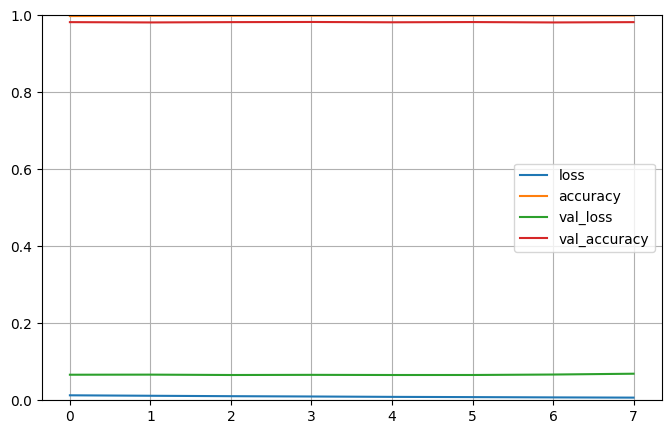

In [82]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

<Axes: >

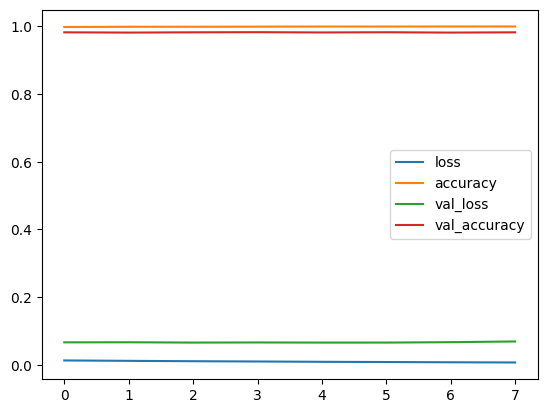

In [83]:







pd.DataFrame(history.history).plot()

In [84]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9785


[0.07080359011888504, 0.9785000085830688]

**SAMPLE CHECK TEST DATA**

In [85]:
X_new = X_test[:3]
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

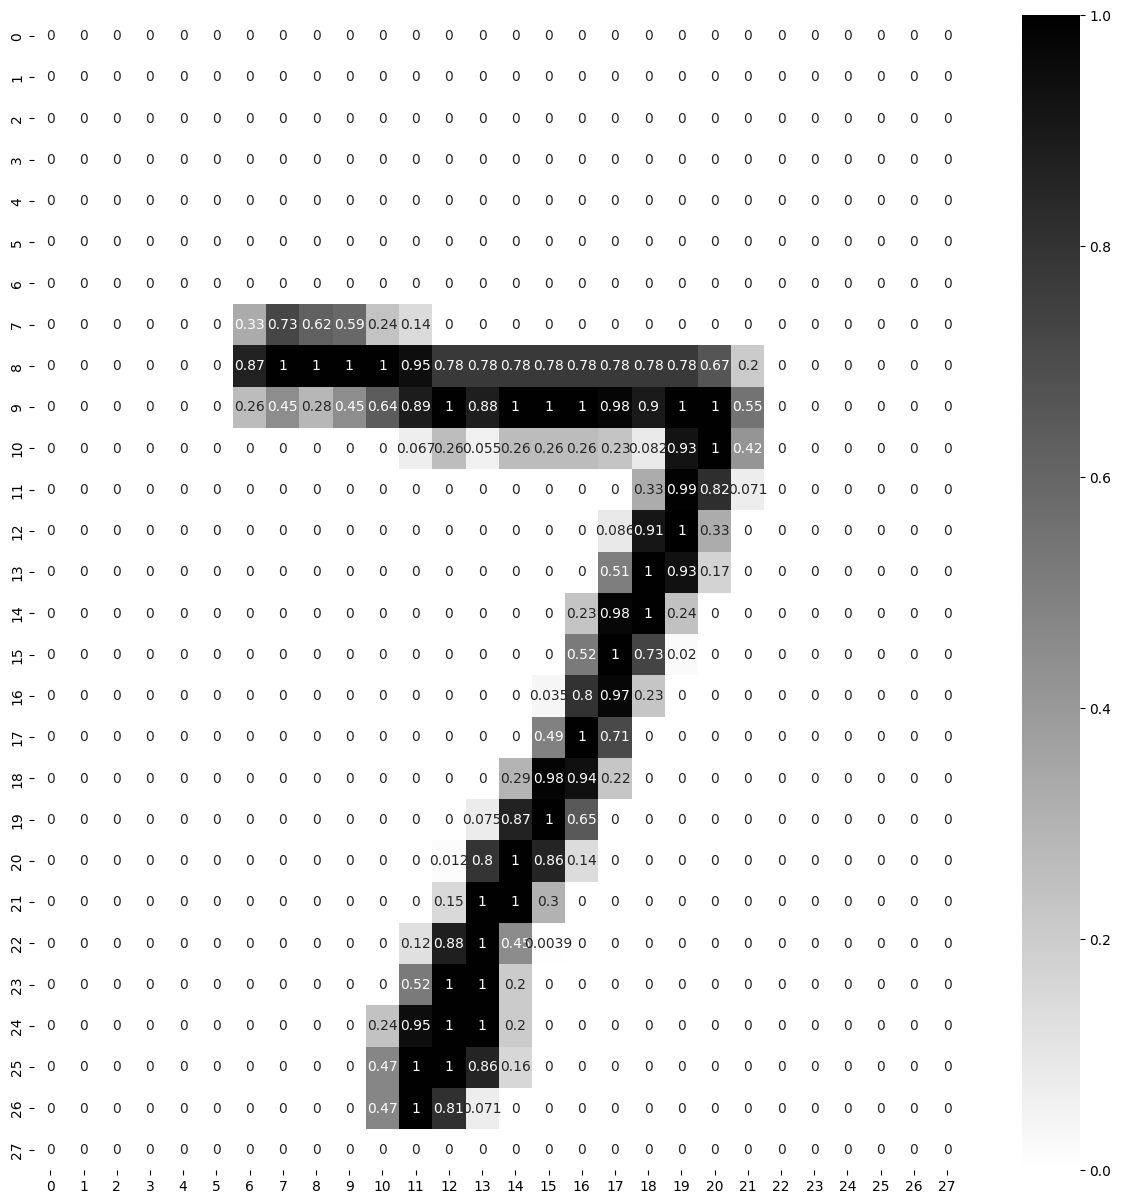

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(X_new[0], annot = True , cmap = 'binary')

In [87]:
y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 29ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [88]:
y_prob

array([[7.1353134e-07, 2.5075879e-08, 1.5530381e-05, 1.1592753e-04,
        4.0885287e-10, 9.3115254e-08, 8.2961641e-12, 9.9986506e-01,
        3.3072251e-07, 2.2494901e-06],
       [6.4077661e-08, 3.2961116e-06, 9.9999368e-01, 2.5235099e-06,
        1.9273554e-14, 2.6470619e-09, 4.0352884e-08, 7.9687960e-13,
        4.3808555e-07, 1.2860168e-12],
       [7.4008750e-07, 9.9952674e-01, 3.5940808e-05, 1.1906643e-06,
        5.4352291e-05, 1.4022378e-06, 8.1600265e-06, 5.9144928e-05,
        3.0971289e-04, 2.5963107e-06]], dtype=float32)

In [89]:
y_pred = np.argmax(y_prob, axis=-1)

In [90]:
y_pred

array([7, 2, 1])

In [91]:
actual

array([7, 2, 1], dtype=uint8)

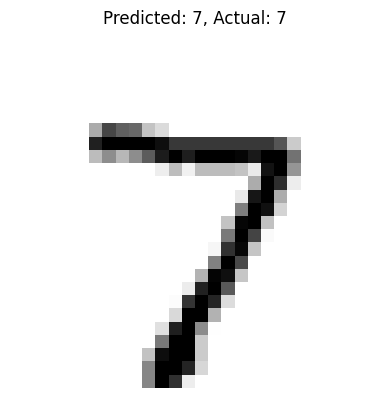

######################################


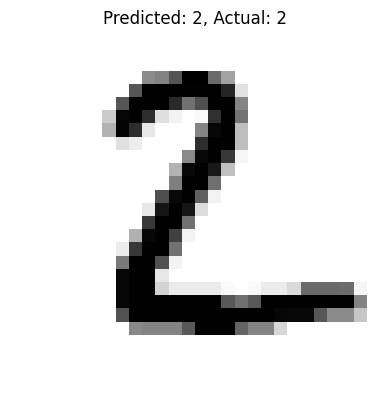

######################################


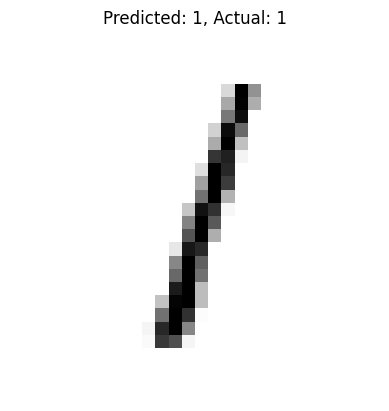

######################################


In [92]:
# plot
for data, pred, actual_data in zip(X_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################################")